<a href="https://colab.research.google.com/github/pa1kpuram/projects/blob/main/Business_Case_Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Business Case: Netflix - Data Exploration and Visualisation**

**Table of contents**

**Title : Business Case: Netflix - Data Exploration and Visualisation**

1. **Introduction**
2. **Exploratory Data Analysis**
    
    📊 Statistical Summary
    
    👥 Duplicate Detection

    ✅ Column Sanity Check: Validating Data Quality and Structure

    👨🏽‍💻 Exploring Missing Values
    
    🧩 Filling Missing Values

    ➕ Adding new columns for better analysis
    
    ➗ Un-nesting the columns for better analysis

3. **Data Visualisation**

    3.1 Univariate Analysis 📊

    3.2 Bivariate Analysis 📊

    3.3 Monthly Addition of Movies and TV Series on Netflix 📅
    
    3.4 No of movies and TV series added yearwise 📈
    
    3.5 Top 10 Countries' Contribution to Netflix: Movies vs. TV Shows 🌍
    
    3.6 Visualizing Weekly Trends: TV Shows and Movies Added Each Week 📉
    
    3.7 Analyzing the Best Months for TV Show and Movie Releases on Netflix 🗓️
    
    3.8 Top 10 Directors Dominating Netflix: A Visual Exploration 🎬
    
    3.9 Top 10 Actors with the Most Appearances in Netflix Titles 🌟
    
    3.10 Unveiling Netflix's Genre Diversity: A Vibrant word Analysis 🎭

4 **Business Recommendations**



# **1. Introduction**


**📺Meet Netflix:Your Gateway to Entertainment:**
From its origins as a DVD rental service in 1997, Netflix has transformed into a global powerhouse in media and entertainment. With a subscriber base exceeding 222 million globally, Netflix has become synonymous with on-demand streaming, offering a vast array of movies, TV shows, documentaries, and original content.

**🎬 Business Problem:**
As Netflix continues its expansion, it faces the challenge of delivering content that resonates with diverse audiences worldwide. The business problem lies in harnessing data analytics to inform content strategy effectively, ensuring sustained growth and viewer engagement amidst fierce competition in the streaming industry.

**🎯 Objective:**
The objective is clear: leverage data-driven insights to inform key aspects of Netflix's content strategy and drive business growth. This includes understanding viewer preferences, optimizing content production, exploring market expansion opportunities, maximizing viewer retention, and ultimately driving subscriber growth.

**🔍 Scope of Analysis:**
The scope of analysis encompasses a comprehensive examination of Netflix's global content offerings, spanning both movies and TV shows. Key areas of focus include analyzing trends in viewer behavior, understanding content attributes that drive engagement, exploring opportunities for market expansion, and providing actionable recommendations for business action based on insights derived from the analysis.

**📊 Data Overview:** Below is a comprehensive overview of the dataset, detailing each feature along with its description:

| Feature       | Description                                              |
|---------------|----------------------------------------------------------|
| Show ID       | The ID of the show                                       |
| Type          | Identifier - A Movie or TV Show                          |
| Title         | Title of the Movie / TV Show                             |
| Director      | Director of the Movie                                    |
| Cast          | Actors involved in the movie/show                        |
| Country       | Country where the movie/show was produced                |
| Date Added    | Date it was added on Netflix                             |
| Release Year  | Actual Release year of the movie/show                    |
| Rating        | TV Rating of the movie/show                              |
| Duration      | Total Duration - in minutes or number of seasons         |
| Listed In     | Genre                                                    |
| Description   | The summary description                                  |



# **2.Exploratory Data Analysis**

In [3]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
import copy
from wordcloud import WordCloud

In [5]:
#Loading of dataset
df = pd.read_csv("/content/netflix.csv")
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [7]:
df.head() #to display the first few rows of a DataFrame

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.tail() #to display the last few rows of a DataFrame

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [8]:
df.shape #to fetch no of rows & columns

(8807, 12)

In [9]:
df.info() # to display summary of a DataFrame, including the index dtype, column dtypes, non-null values, and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


🔍 **Insights**

The dataset comprises 8807 entries with 12 features. Most features are textual, with one integer feature (`release_year`). Missing data is present in multiple columns, indicating a need for preprocessing. Analysis could focus on content types, geographical distribution, ratings, durations, genres, and descriptions, offering insights into content trends and audience preferences.

### **📊 Statistical Summary**

In [10]:
df.describe(include='object') # Display summary statistics for object columns

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In [11]:
df.describe() # Display summary statistics for numerical columns

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


Here are the 🔍 **Insights** derived from the summary:


- **Content Type Distribution**: Among the 8807 items available on Netflix, movies comprise 6131 entries, accounting for approximately 70% of the total content. TV series make up the remaining 30%.

- **Director Contribution**: Rajiv Chilaka stands out as the top director on Netflix, credited with 19 productions, primarily animated movies for children.

- **Prominent Cast Member**: David Attenborough leads the actor list with 19 appearances in various films and shows on Netflix.

- **Country of Production**: The USA ranks at the top as the country with the highest production contribution to Netflix, accounting for approximately 35% of the total content.

- **Peak Upload Date**: January 1, 2020, emerges as the peak date for content uploads on Netflix, with approximately 109 different shows and movies added to the platform on that day alone.

- **Rating Dominance**: Among the 17 different types of ratings present on Netflix, "TV-MA" (Mature Audience Only) dominates, covering almost 36% of the total shows and movies on the platform with this rating.

### 👥 Duplicate Detection

In [12]:
df.duplicated().value_counts()

False    8807
Name: count, dtype: int64

🔍 **Insights**
- There are no duplicate entries in the dataset

### ✅ Column Sanity Check: Validating Data Quality and Structure

In [13]:
print(df.dtypes) # Check data types of columns

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


In [14]:
# Check for unique values in identifier columns
print("Unique values in 'show_id':", df['show_id'].nunique())

Unique values in 'show_id': 8807


In [15]:
# checking the value_counts for columns
for i in ['type','release_year','rating','duration']:
    print('Value count in',i,'column are :-')
    print(df[i].value_counts())
    print('-'*70)

Value count in type column are :-
type
Movie      6131
TV Show    2676
Name: count, dtype: int64
----------------------------------------------------------------------
Value count in release_year column are :-
release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: count, Length: 74, dtype: int64
----------------------------------------------------------------------
Value count in rating column are :-
rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64
----------------------------------------------------------------------
Value count in duration column are :-
duration
1 Season     1793
2 Seasons     425
3 Seasons    

**Insights:**

- The rating column contains three unusual values: "74 min", "84 min", and "66 min".
- To address this issue, we will replace these values with NaN (missing values) using the pandas `replace()` function.
- After replacement, the DataFrame `df` will be updated in place, ensuring consistency and preparing the data for further analysis.

In [16]:
df['rating'].replace({'74 min':np.nan ,'84 min' : np.nan, '66 min' : np.nan},inplace = True)

### 👨🏽‍💻 Exploring Missing Values

In [17]:
# Identify Missing Values
missing_values = df.isnull().sum()
missing_values

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             7
duration           3
listed_in          0
description        0
dtype: int64

In [18]:
missing_percentage = (missing_values / len(df)) * 100 #percentage of missing values
missing_percentage

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.079482
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

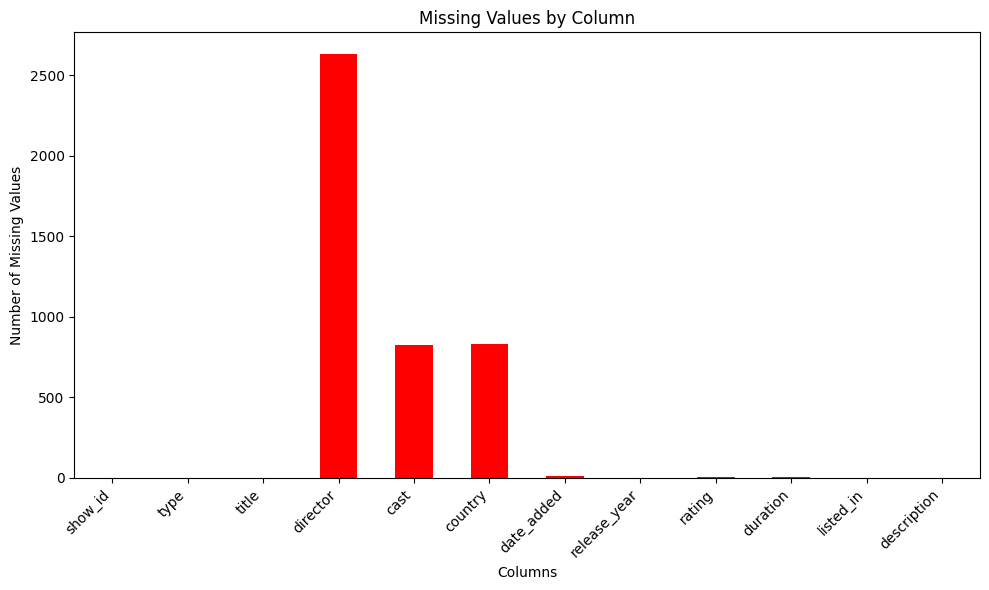

In [19]:
# Plot Missing Values as a Bar Chart
plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar', color='r')
plt.title('Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

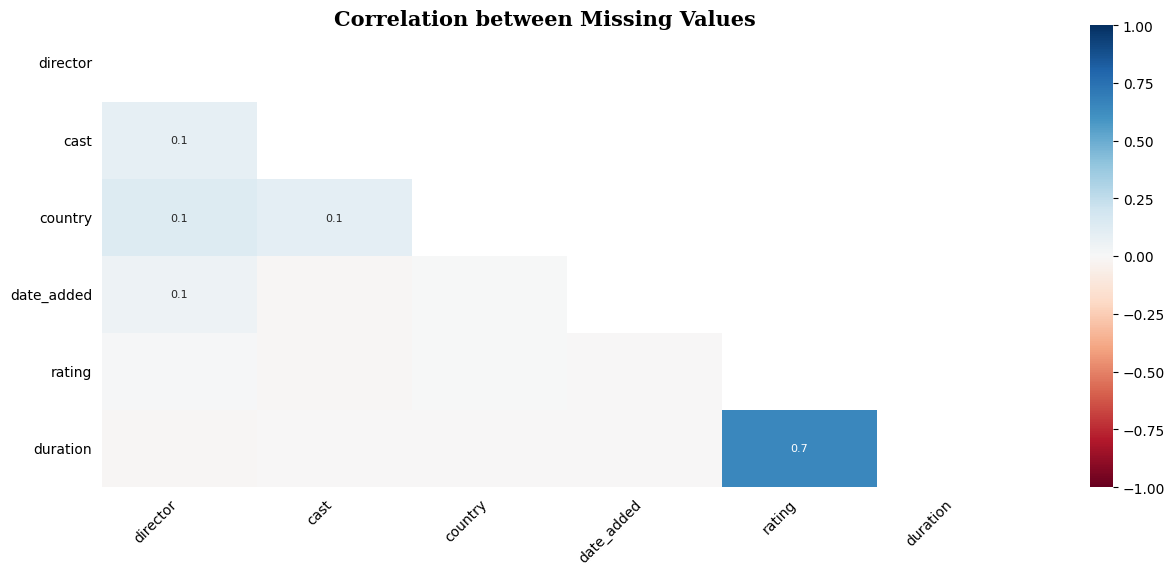

In [20]:
# Plot correlation between missing values as a heatmap
ax = msno.heatmap(df, figsize=(15, 6), fontsize=10)
ax.text(1.5, 0, 'Correlation between Missing Values', {'font': 'serif', 'color': 'black', 'weight': 'bold', 'size': 15})
plt.show()

**Insights:**
- Among the 6 columns with missing values, "Director" has the most, followed by "Cast" and "Country".
- "Date Added", "Ratings", and "Duration" exhibit minimal missing values (<1%).
- The heatmap reveals a strong correlation between missing values in the "Rating" and "Duration" columns, while other correlations are close to 0, indicating independent missingness across columns.

### **Filling Missing Values**


**Director, Cast, and Country Columns:**
   - Fill missing values with standard placeholders:
     - Director: "Unknown Director"
     - Cast: "Unknown Cast"
     - Country: "Unknown Country"
   - This approach ensures uniformity and preserves the structure of the dataset.


In [21]:
#Fillling up the missing values
df['director'].fillna('Unknown Director',inplace = True)
df['cast'].fillna('Unknown cast',inplace = True)
df['country'].fillna('Unknown country',inplace = True)

In [ ]:
df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           7
duration         3
listed_in        0
description      0
dtype: int64

There are still missing values present in the "date_added" column (10), "rating" column (7), and "duration" column (3) of the dataset.

In [22]:
df["rating"].value_counts() #checking unique values in rating columns.

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

In [23]:
# Locate rows where the rating value is unusual
df.loc[(df["rating"] == "74 min") | (df["rating"] == "84 min") | (df["rating"] == "66 min")]
# Assign the values from the "rating" column to the "duration" column for the specified rows
df["duration"][[5541,5794,5813]] = df["rating"][[5541,5794,5813]]
df["rating"][[5541,5794,5813]] = "Nan" # Set the "rating" values for the specified rows to "Nan"

In [24]:
df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64

In [25]:
df["rating"].value_counts() #checking unique values in rating columns.

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
Nan            3
UR             3
Name: count, dtype: int64

### **➕ Adding new columns for better analysis**

In [26]:
# Read the data into a DataFrame
df = pd.read_csv("netflix.csv")

# Strip leading and trailing spaces from the "date_added" column
df['date_added'] = df['date_added'].str.strip()

# Convert the "date_added" column to datetime format
df['date_added'] = pd.to_datetime(df['date_added'])

# Add new columns based on the "date_added" column
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month_name()
df['week_added'] = df['date_added'].dt.isocalendar().week

# Print the first three rows of the DataFrame
print(df.head(3))

  show_id     type                 title         director  \
0      s1    Movie  Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show         Blood & Water              NaN   
2      s3  TV Show             Ganglands  Julien Leclercq   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   

  date_added  release_year rating   duration  \
0 2021-09-25          2020  PG-13     90 min   
1 2021-09-24          2021  TV-MA  2 Seasons   
2 2021-09-24          2021  TV-MA   1 Season   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   

                                         description

###**➗ Un-nesting the columns for better analysis**

In [27]:
import copy

# Create a separate DataFrame with un-nested columns
df1 = copy.deepcopy(df)

# Splitting columns into lists
df1["director"] = df["director"].str.split(", ")
df1["cast"] = df["cast"].str.split(", ")
df1["country"] = df["country"].str.split(", ")

# Explode lists to create multiple rows
df1 = df1.explode(['director'])
df1 = df1.explode(['cast'])
df1 = df1.explode(['country'])

# Display the first 3 rows of the new DataFrame
print(df1.head(3))


  show_id     type                 title         director         cast  \
0      s1    Movie  Dick Johnson Is Dead  Kirsten Johnson          NaN   
1      s2  TV Show         Blood & Water              NaN   Ama Qamata   
1      s2  TV Show         Blood & Water              NaN  Khosi Ngema   

         country date_added  release_year rating   duration  \
0  United States 2021-09-25          2020  PG-13     90 min   
1   South Africa 2021-09-24          2021  TV-MA  2 Seasons   
1   South Africa 2021-09-24          2021  TV-MA  2 Seasons   

                                         listed_in  \
0                                    Documentaries   
1  International TV Shows, TV Dramas, TV Mysteries   
1  International TV Shows, TV Dramas, TV Mysteries   

                                         description  year_added month_added  \
0  As her father nears the end of his life, filmm...      2021.0   September   
1  After crossing paths at a party, a Cape Town t...      2021.0   Septem

In [28]:
#checking shape of new df
df1.shape

(89382, 15)

#**3. Data Visualisation**

###**3.1 Univariate Analysis**

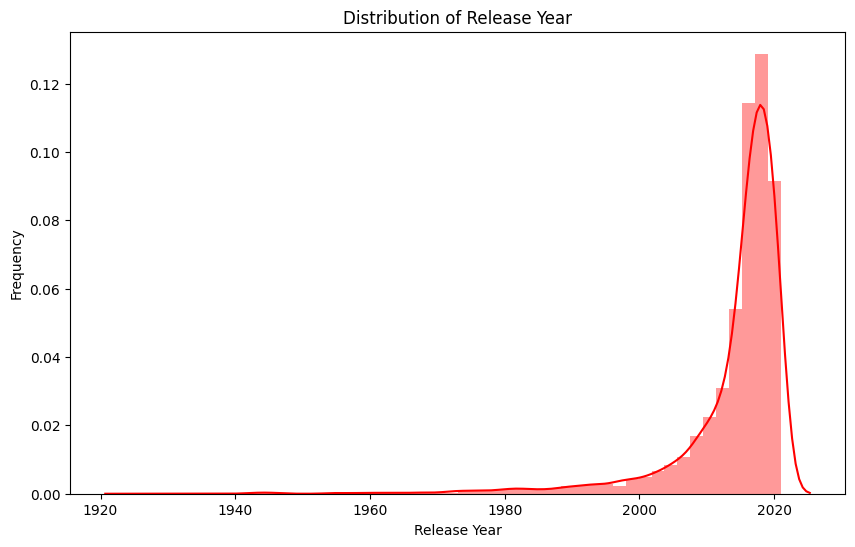

In [31]:
# Univariate Analysis for Continuous Variables
# Plotting distplot for the 'release_year' column
plt.figure(figsize=(10, 6))
sns.distplot(df['release_year'], color='r')
plt.title('Distribution of Release Year')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()


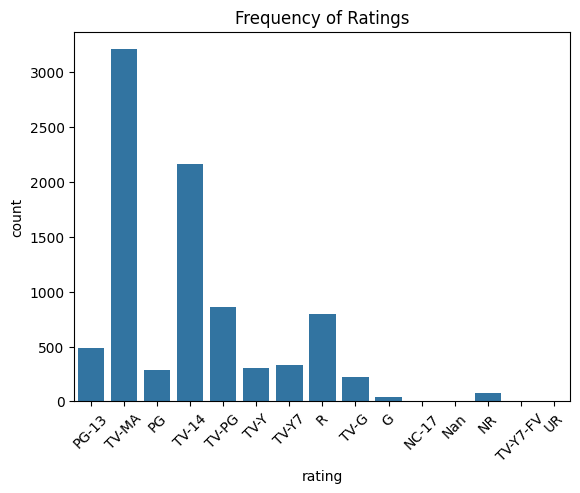

In [ ]:
# Countplot
sns.countplot(x='rating', data=df)
plt.title('Frequency of Ratings')
plt.xticks(rotation=45)
plt.show()

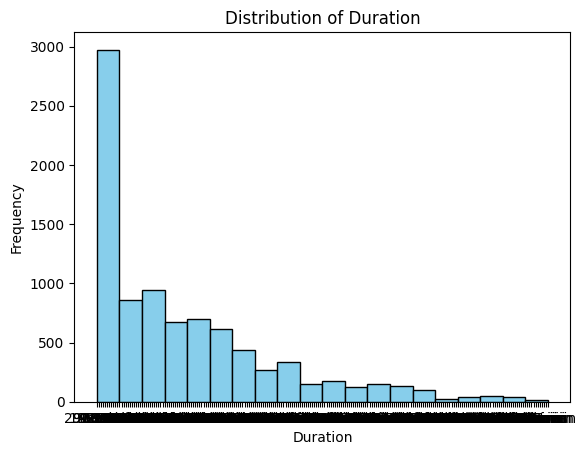

In [ ]:
# Histogram
plt.hist(df['duration'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Duration')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

### **3.2 Bivariate Analysis**

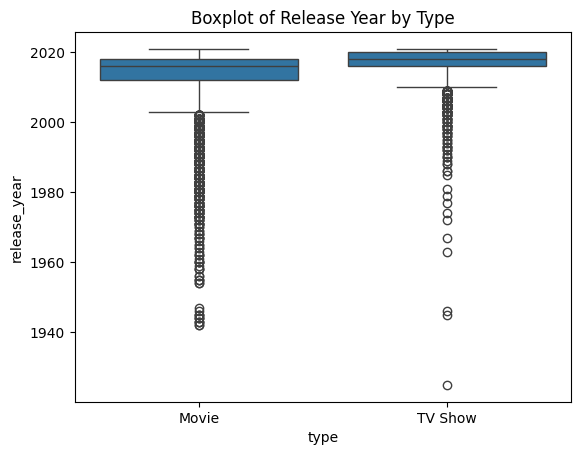

In [ ]:
# Bivariate Analysis
# Boxplot for Categorical Variables
sns.boxplot(x='type', y='release_year', data=df)
plt.title('Boxplot of Release Year by Type')
plt.show()

<Figure size 1200x1000 with 0 Axes>

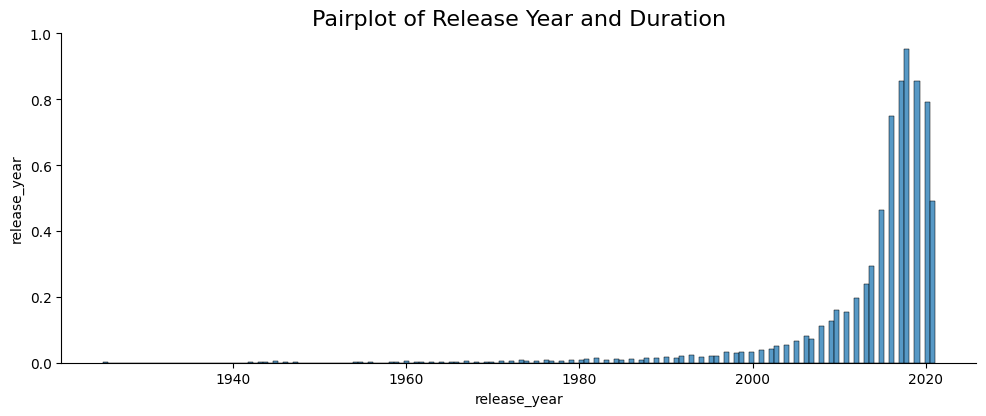

In [ ]:
# Pairplot
plt.figure(figsize=(12, 10))
sns.pairplot(df[['release_year', 'duration']], height=4, aspect=2.5)
plt.title('Pairplot of Release Year and Duration', fontsize=16)
plt.show()

#### **Insights from Visual Analysis**

#### Univariate Analysis for Continuous Variables:
1. **Distribution of Release Year:** The distplot indicates a right-skewed distribution, suggesting that more content has been released in recent years.
2. **Frequency of Ratings:** The countplot reveals that TV-MA is the most common rating, followed by TV-14 and TV-PG, indicating the prevalence of mature content on the platform.
3. **Distribution of Duration:** The histogram illustrates a right-skewed distribution for duration, indicating that most content has relatively shorter durations.

#### Bivariate Analysis:
4. **Boxplot of Release Year by Type:** The boxplot shows that movies tend to have a wider range of release years compared to TV shows, highlighting differences in the distribution of release years between the two types of content.
5. **Pairplot of Release Year and Duration:** The pairplot displays the relationship between release year and duration.

These insights provide valuable information about the distribution, relationships, and characteristics of the variables within the dataset, aiding in further analysis and interpretation.

### **3.3  Monthly Addition of Movies and TV Series on Netflix**

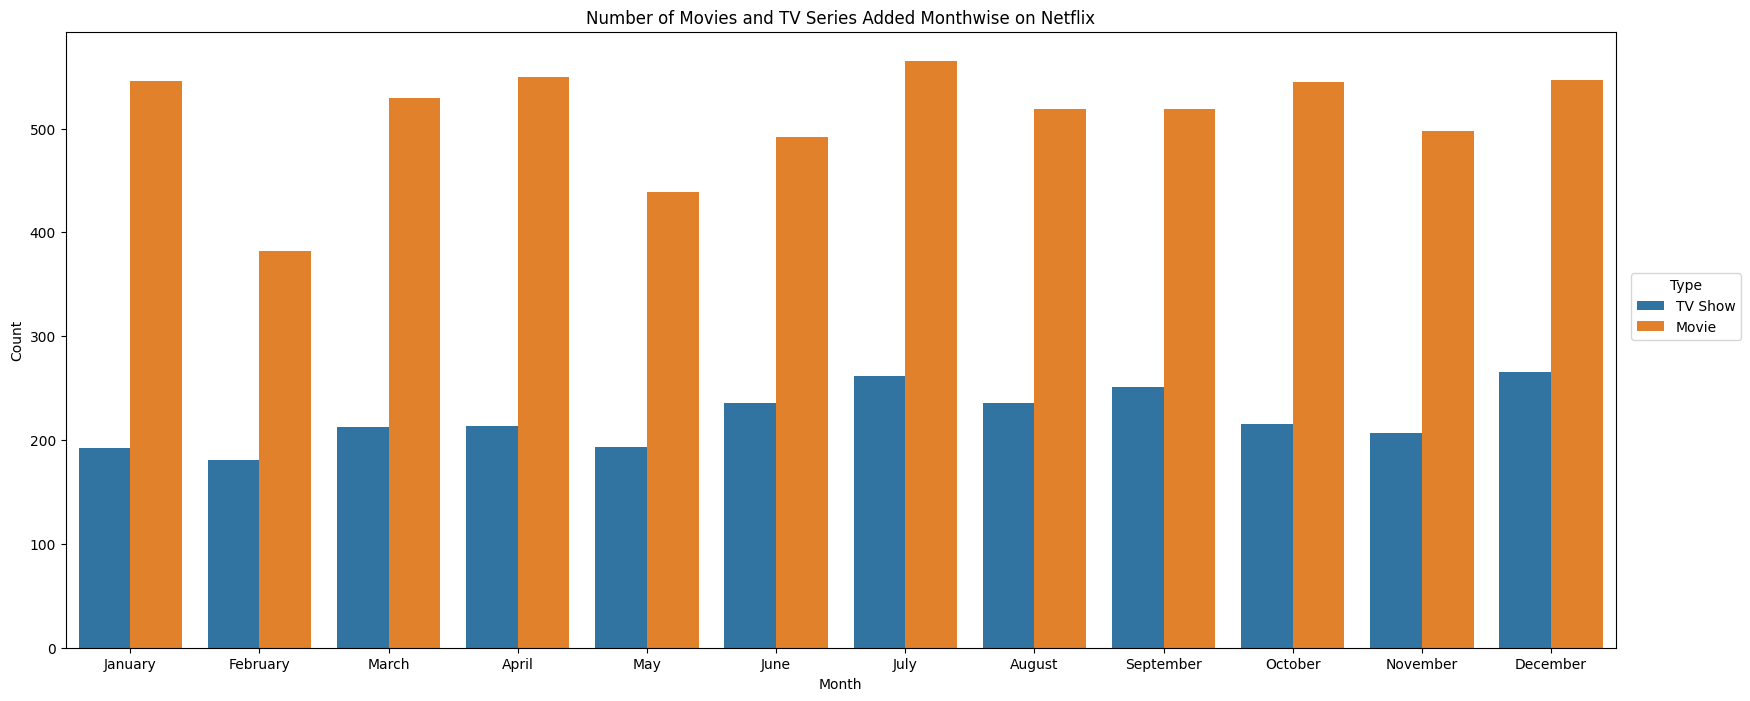

In [34]:
# Convert the DataFrame to include year, month, and day information
df_datetime = pd.DataFrame(df)
df_datetime['Year'] = df.date_added.dt.year
df_datetime['month'] = df.date_added.dt.month
df_datetime['day'] = df.date_added.dt.day_name()

# Sort the DataFrame by month and add month names
df_datetime_month = df_datetime.sort_values(by ="month")
df_datetime_month['month_name'] = df.date_added.dt.month_name()

# Plot the number of movies and TV series added monthwise
plt.figure(figsize=(20,8))
sns.countplot(x="month_name", data=df_datetime_month, hue="type")
plt.title("Number of Movies and TV Series Added Monthwise on Netflix")
plt.xlabel("Month")
plt.ylabel("Count")
plt.legend(title="Type", loc=(1.01,0.5))
plt.show()

🔍 **Insights**
1. July and December stand out as the peak months for content additions on Netflix.
2. Across all months, the number of movies added consistently surpasses the number of TV shows, highlighting a continuous emphasis on expanding the movie catalog.
3. The analysis underscores the seasonal variations in content additions, with July and December emerging as key periods for new content releases.

### **3.4  No of movies and TV series added yearwise**

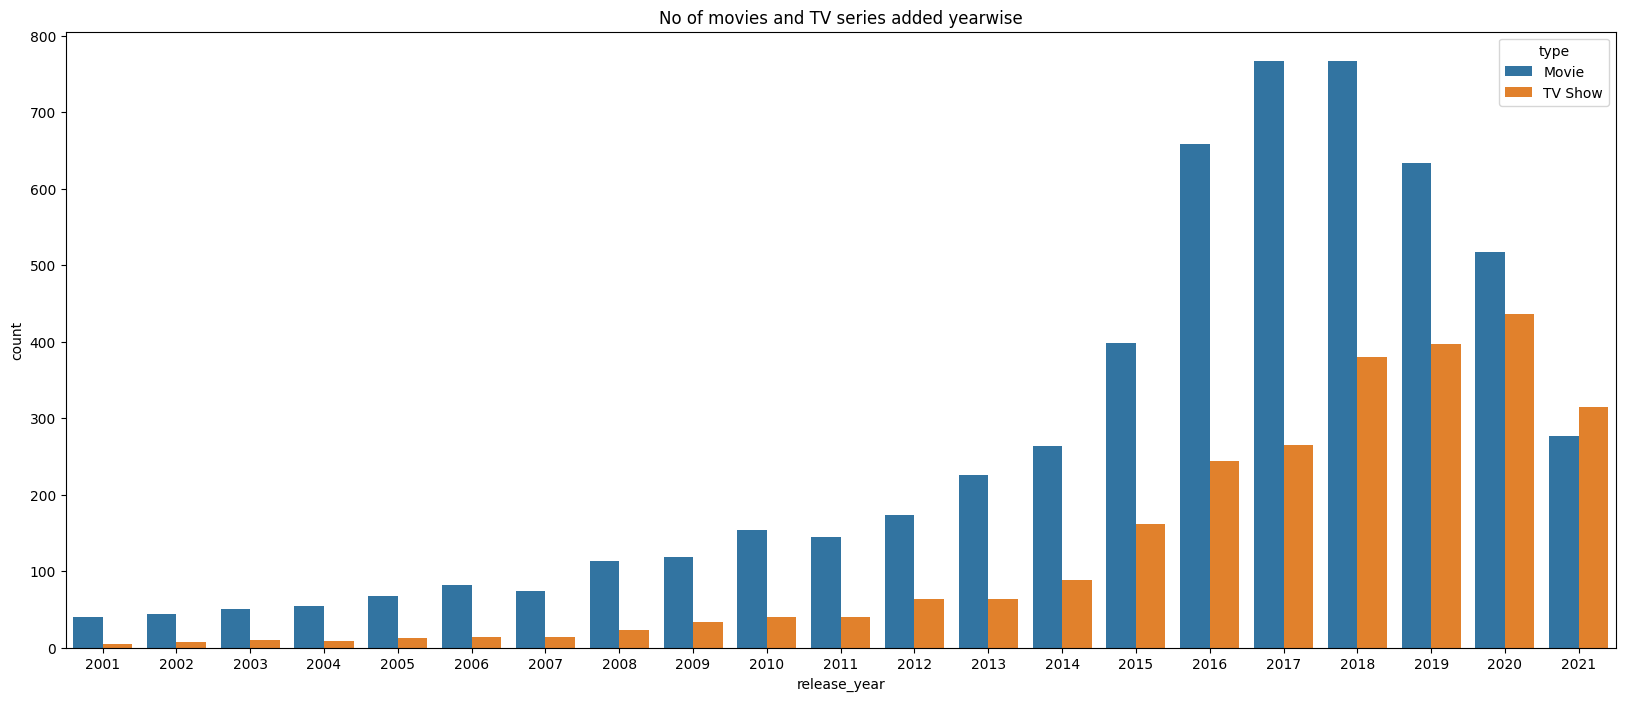

In [41]:
plt.figure(figsize=(20,8))
df_year = df.loc[df['release_year']>2000] #used masked to get out data for movies and TV shows released after 2000
sns.countplot(x='release_year', data=df_year, hue='type')
plt.title("No of movies and TV series added yearwise")
plt.show()

🔍 **Insights**
- In 2020, Netflix added the most TV shows, while movie additions have been steadily increasing since 2015.
- However, there was a significant drop in movie additions in 2021, possibly due to the COVID-19 pandemic.

### **3.5  Top 10 Countries' Contribution to Netflix: Movies vs. TV Shows**

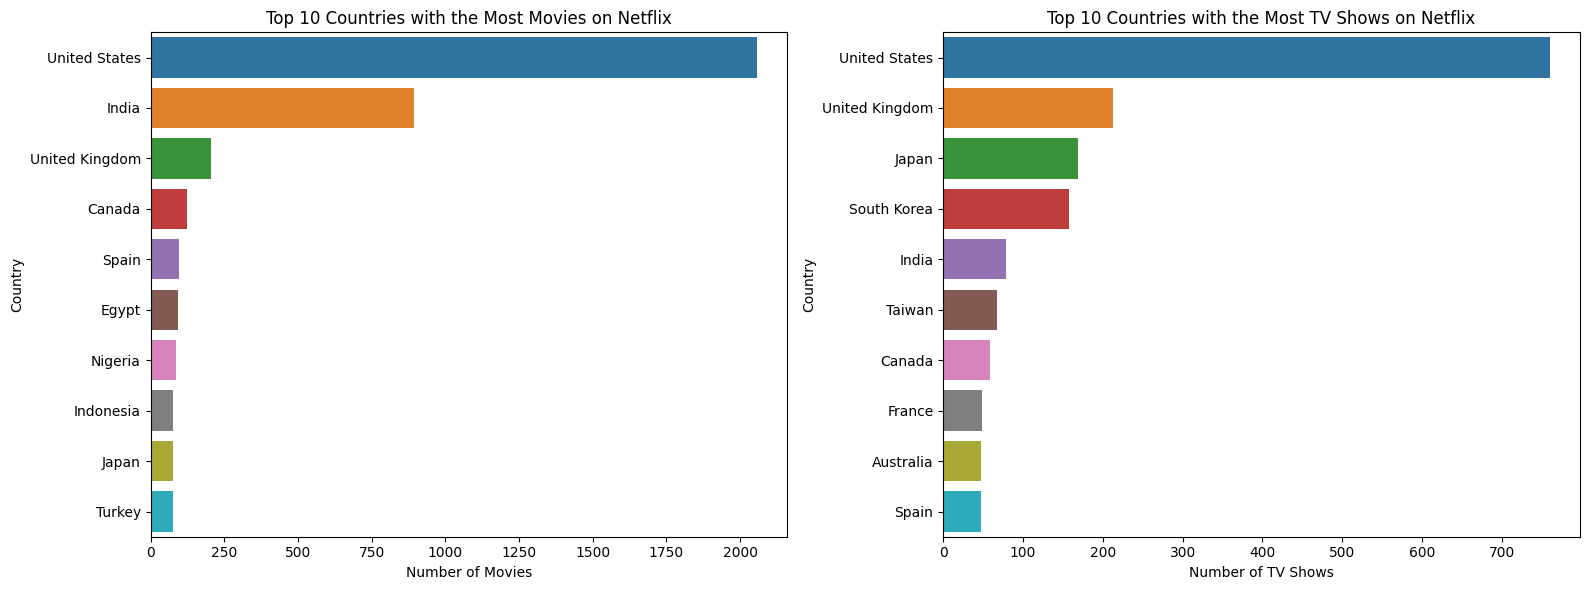

In [61]:
# Define custom color palettes
movie_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
tv_show_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot for movies
sns.barplot(x=top_movie_countries.values, y=top_movie_countries.index, ax=axes[0], palette=movie_palette)
axes[0].set_title('Top 10 Countries with the Most Movies on Netflix')
axes[0].set_xlabel('Number of Movies')
axes[0].set_ylabel('Country')

# Plot for TV shows
sns.barplot(x=top_tv_show_countries.values, y=top_tv_show_countries.index, ax=axes[1], palette=tv_show_palette)
axes[1].set_title('Top 10 Countries with the Most TV Shows on Netflix')
axes[1].set_xlabel('Number of TV Shows')
axes[1].set_ylabel('Country')

plt.tight_layout()
plt.show()


🔍 **Insights**
- The United States stands out as the primary producer for both movies and TV shows on Netflix, followed by diverse contributors such as India, the United Kingdom, and Canada.
- While there's overlap in the top-ranking countries for both categories, variations exist, indicating distinct regional content preferences and production capabilities.
- This underscores the importance of understanding regional landscapes to diversify Netflix's content offerings strategically.

### **3.6  Visualizing Weekly Trends: TV Shows and Movies Added Each Week**

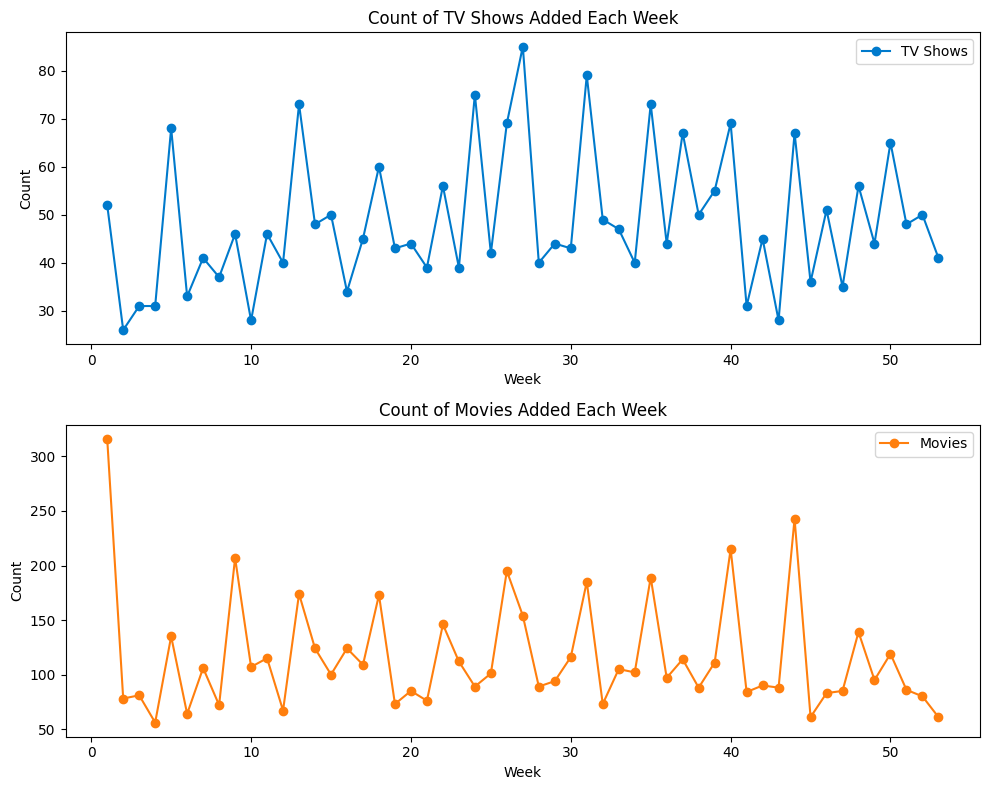

In [82]:
# Define custom color palettes
tv_show_color = '#007acc'  # Blue
movie_color = '#ff7f0e'     # Orange

# Create a figure with subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Plot the counts of TV shows added each week
axes[0].plot(weekly_counts.index, weekly_counts['TV Show'], marker='o', label='TV Shows', color=tv_show_color)
axes[0].set_title('Count of TV Shows Added Each Week')
axes[0].set_xlabel('Week')
axes[0].set_ylabel('Count')
axes[0].legend()

# Plot the counts of movies added each week
axes[1].plot(weekly_counts.index, weekly_counts['Movie'], marker='o', label='Movies', color=movie_color)
axes[1].set_title('Count of Movies Added Each Week')
axes[1].set_xlabel('Week')
axes[1].set_ylabel('Count')
axes[1].legend()

plt.tight_layout()
plt.show()

🔍 **Insights**
1. Movies and TV shows exhibit similar weekly upload trends, implying synchronized content release strategies.
2. A distinct monthly pattern emerges, with content spikes followed by three weeks of lower activity, possibly indicating a monthly release schedule.
3. Movies peak at the start of the year, suggesting strategic planning around the new year.
4. TV shows peak around the 26th week, implying a preference for mid-year releases, perhaps driven by viewership patterns or seasonal considerations.

### **3.7  Analyzing the Best Months for TV Show and Movie Releases on Netflix**

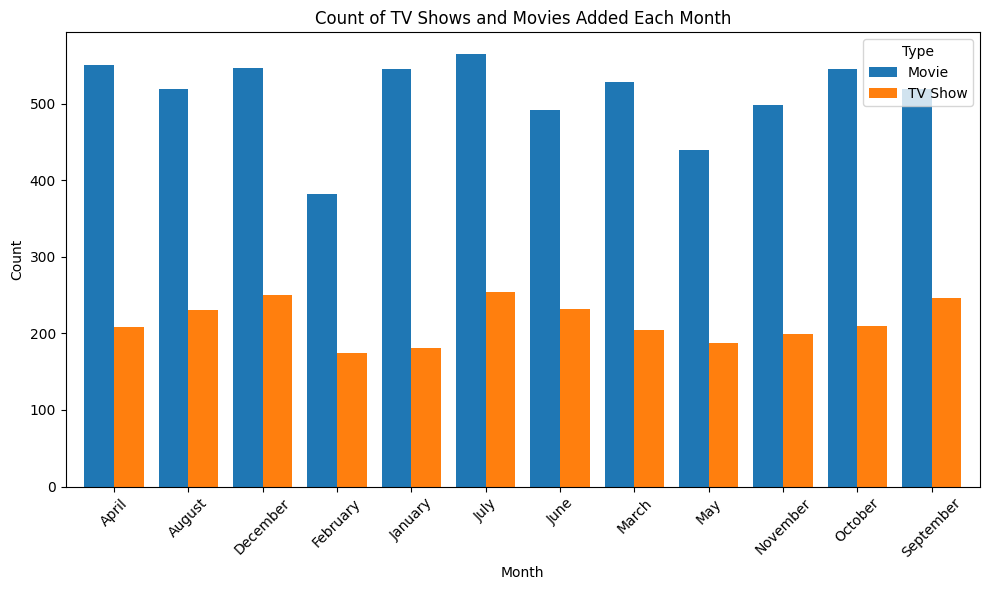

In [84]:
# Convert 'date_added' column to datetime format
df['date_added'] = pd.to_datetime(df['date_added'])

# Extract month from the 'date_added' column
df['month_added'] = df['date_added'].dt.month_name()

# Group by month and count the number of TV shows and movies
monthly_counts = df.groupby(['month_added', 'type']).size().unstack(fill_value=0)

# Plot the counts of TV shows and movies added each month
monthly_counts.plot(kind='bar', figsize=(10, 6), width=0.8)

# Customize the plot
plt.title('Count of TV Shows and Movies Added Each Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Type')

plt.tight_layout()
plt.show()


🔍 **Insights**
1. Both TV shows and movies follow similar monthly upload trends, suggesting consistency in content additions throughout the year.
   
2. Significant spikes in content additions occur in January and December, likely influenced by New Year celebrations and holiday breaks.
   
3. Months like February, May, and November witness comparatively lower content upload counts, possibly due to lower viewer engagement with other activities during those periods.

4. Strategic release planning can leverage this data to focus on high-content volume months and optimize releases for maximum audience reach and impact.

### **3.8 Top 10 Directors Dominating Netflix: A Visual Exploration**

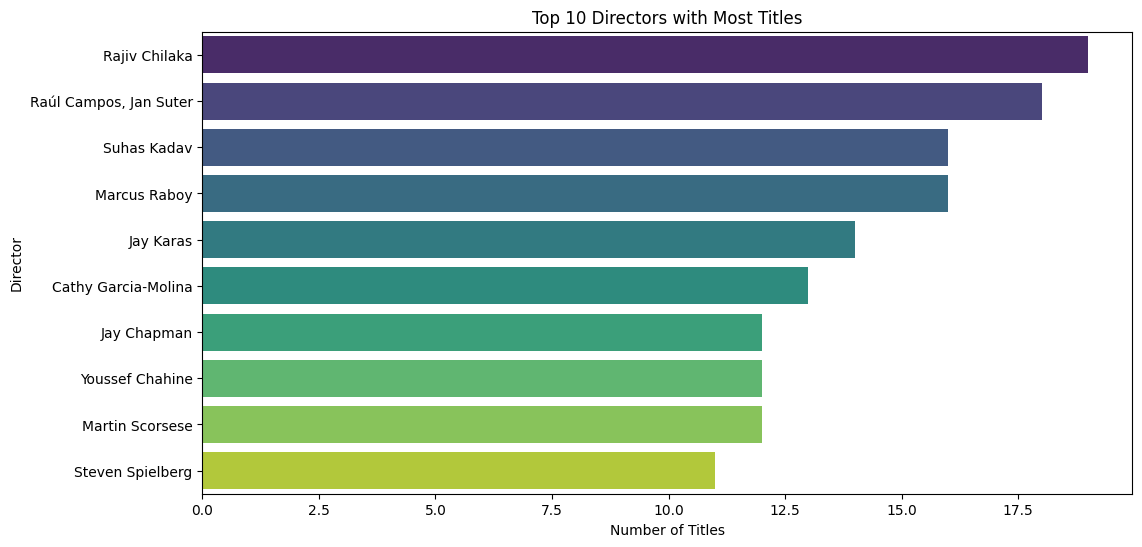

In [90]:
# Grouping by director and counting unique titles
director_counts = df.groupby('director')['title'].nunique().sort_values(ascending=False)

# Selecting the top 10 directors
top_directors = director_counts.head(10)

# Define a custom color palette
custom_palette = sns.color_palette('viridis', len(top_directors))

# Plotting the top 10 directors with custom colors
plt.figure(figsize=(12, 6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette=custom_palette)
plt.title('Top 10 Directors with Most Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

🔍 **Insights**
1. Rajiv Chilaka leads with 19 titles, known for animated content.
2. Raúl Campos and Jan Suter follow closely with 18 titles.
3. Suhas Kadav and Marcus Raboy tie with 16 titles each.
4. A mix of directors from various genres and regions feature in the top 10.
5. Steven Spielberg and Martin Scorsese represent established Hollywood directors on the list.

### **3.9 Top 10 Actors with the Most Appearances in Netflix Titles**

In [98]:
a_cnt = df1.groupby('cast')['title'].nunique().sort_values(ascending  = False)[0:11].reset_index()

a_cnt

,cast,title
0,Anupam Kher,43
1,Shah Rukh Khan,35
2,Julie Tejwani,33
3,Naseeruddin Shah,32
4,Takahiro Sakurai,32
5,Rupa Bhimani,31
6,Akshay Kumar,30
7,Om Puri,30
8,Yuki Kaji,29
9,Amitabh Bachchan,28


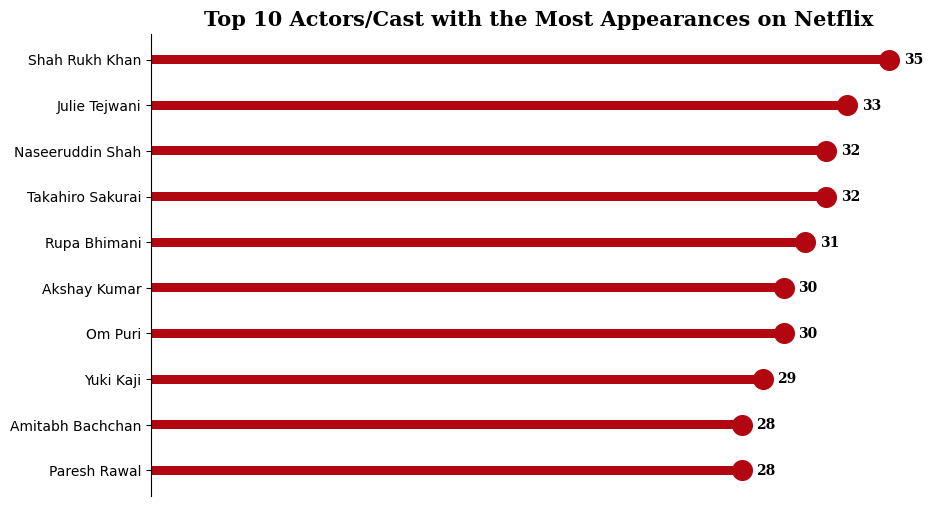

In [99]:
# droping unknown actor and reversing the list
a_cnt = a_cnt.iloc[-1:-11:-1]

# Setting the plot style
fig, ax = plt.subplots(figsize=(10, 6))

# Creating the plot
ax.barh(y=a_cnt['cast'], width=a_cnt['title'], height=0.2, color='#b20710')
ax.scatter(y=a_cnt['cast'], x=a_cnt['title'], s=200, color='#b20710')

# Removing x-axis
ax.set_xticks([])

# Adding label to each bar
for y, x in zip(a_cnt['cast'], a_cnt['title']):
    ax.text(x + 0.7, y, x, {'font': 'serif', 'size': 10, 'weight': 'bold'}, va='center')

# Removing the axis lines
for s in ['top', 'bottom', 'right']:
    ax.spines[s].set_visible(False)

# Creating the title
ax.set_title('Top 10 Actors/Cast with the Most Appearances on Netflix',
             {'font': 'serif', 'size': 15, 'weight': 'bold'})

plt.show()

🔍 **Insights**
- The top actors/cast members with the most appearances on Netflix reflect a diverse range of talent, from Bollywood icons like Shah Rukh Khan and Amitabh Bachchan to internationally recognized figures like Takahiro Sakurai and Yuki Kaji.
- Their significant presence across various Netflix titles underscores the platform's global appeal and commitment to offering diverse and engaging content to audiences worldwide.

### **3.10 Unveiling Netflix's Genre Diversity: A Vibrant word Analysis**

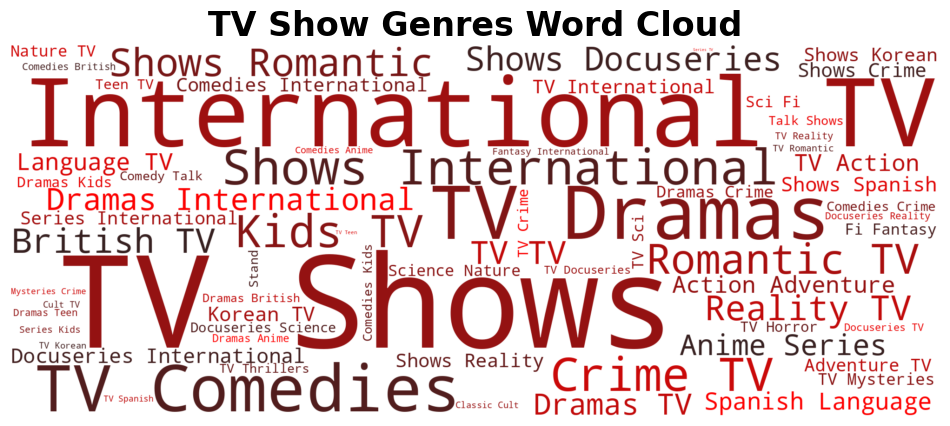

In [128]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for TV shows
tv_genre = df[df['type'] == 'TV Show']

# Concatenate all listed_in values into a single text string
text = str(list(tv_genre['listed_in'])).replace(',','').replace("'",'').replace('"','').replace('[','').replace(']','')

# Define color palette
color = sns.color_palette("dark:red", as_cmap=True)

# Generate word cloud
wordcloud = WordCloud(max_words=150, width=2000, height=800, background_color='white', colormap=color,
                      contour_color='red', contour_width=2).generate(text)

# Plot word cloud for TV show genres
plt.figure(figsize=(12, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('TV Show Genres Word Cloud', color='black', fontsize=24, fontweight='bold')
plt.axis('off')
plt.show()


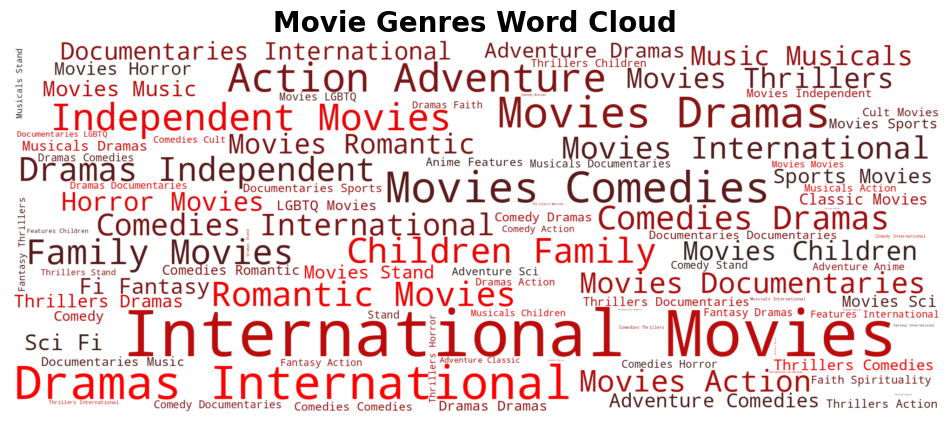

In [131]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for movies
movie_genre = df[df['type'] == 'Movie']

# Concatenate all listed_in values into a single text string
text = str(list(movie_genre['listed_in'])).replace(',','').replace("'",'').replace('"','').replace('[','').replace(']','')

# Define color palette
color = sns.color_palette("dark:red", as_cmap=True)

# Generate word cloud
wordcloud = WordCloud(max_words=150, width=2000, height=800, background_color='white', colormap=color).generate(text)

# Plot word cloud for movie genres
plt.figure(figsize=(12, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Movie Genres Word Cloud', color='black', fontsize=20, fontweight='bold')
plt.axis('off')
plt.show()


🔍 **Insights**
- The word cloud analysis reveals that the most prevalent TV show genres on Netflix include Drama, International TV Shows, and Comedy.
- These genres dominate the content landscape, indicating their popularity among viewers. Additionally, genres like Crime TV Shows, Kids' TV, and
- Documentaries also exhibit a significant presence, suggesting a diverse range of interests catered to by Netflix.

# **4 Business Recommendations**

Based on our data analysis, here are some strategic recommendations for Netflix:

1. **Investment in Localized Content:**
   - Recognize the significance of catering to local preferences and continue investing in producing content tailored to different cultural and linguistic backgrounds worldwide.
   - Increase investment in producing and acquiring Asian TV shows to capitalize on the popularity of TV shows in countries like South Korea and Japan.
   - Prioritize curating a diverse movie library that appeals to European viewers, acknowledging their preference for movies.

2. **Strategic Release Timing:**
   - Implement a monthly strategy focusing on releasing high-quality content during peak demand months such as January, July, August, October, and December.
   - Introduce a "Featured Release Week" in the first week of each month to promote major TV shows or movies, leveraging the subsequent weeks to highlight existing content.

3. **Age-Targeted Content Expansion:**
   - Collaborate with local production studios in India and Japan to develop original series and movies targeted towards the teenage audience.
   - Invest in creating mature and sophisticated original content for adult-centric markets like Spain, Mexico, Germany, and France.

4. **Diverse Runtimes:**
   - Continue producing standard-length films while exploring opportunities to create medium-length films to cater to viewers' preferences for more depth and storytelling.
   - Focus on producing limited series and shorter season formats to align with the popularity of shorter TV series among viewers.

5. **Optimizing Content Acquisition Strategy:**
   - Work on acquiring more recent movies to reduce the time lag between theatrical release and availability on the platform, especially in regions where faster availability of TV shows is observed.
   - Maintain a balance between adding movies and TV shows, considering the shift in viewer preferences towards web series, particularly evident in 2021.

By implementing these recommendations, Netflix can enhance its content strategy to better meet the diverse needs and preferences of its global audience, thereby maintaining its position as a leading streaming platform in the industry.